In [6]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
data = pd.read_csv(r"../data/gd.csv")

In [8]:
data.head()

,Account_status,Duration_months,Credit_history,loan_Purpose,Credit_amount,Savings/Bonds_AC,Present_Employment_since,loan_wage_ratio,Sex,Marital_status,co-debtors,Tenure,Assets/Physical_property,Age,Other_loans,Housing,Existing Credit,Job_status,Dependents,Telephone,Foreign_worker,Credit_risk
0,A11,6,A34,A43,1169,A65,A75,4,Male,single,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,Female,divorced/separated/married,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,Male,single,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,Male,single,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,Male,single,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [9]:
data.columns

Index(['Account_status', 'Duration_months', 'Credit_history', 'loan_Purpose',
       'Credit_amount', 'Savings/Bonds_AC', 'Present_Employment_since',
       'loan_wage_ratio', 'Sex', 'Marital_status', 'co-debtors', 'Tenure',
       'Assets/Physical_property', 'Age', 'Other_loans', 'Housing',
       'Existing Credit', 'Job_status', 'Dependents', 'Telephone',
       'Foreign_worker', 'Credit_risk'],
      dtype='object')

In [10]:
ordinal_categories = [
    ["A61", "A62", "A63", "A64", "A65"], 
    ["A71", "A72", "A73", "A74", "A75"], 
    ["A124", "A123", "A122", "A121"], 
    ["A171", "A172", "A173", "A174"]
]

In [11]:
ohe_columns = ["Account_status", "Credit_history", "loan_Purpose", "Sex", 
               "Marital_status", "co-debtors", "Other_loans", "Housing", 
               "Dependents", "Telephone", "Foreign_worker"]
rob_scaling = ["Duration_months", "Credit_amount", "Age"]
ord_enc = ["Savings/Bonds_AC", "Present_Employment_since", "Assets/Physical_property", 
           "Job_status"]


In [12]:
ct = ColumnTransformer(
    transformers = [
        ("cat", OneHotEncoder(drop="if_binary", sparse_output=False), ohe_columns), 
        ("scale", RobustScaler(), rob_scaling), 
        ("enc", OrdinalEncoder(categories=ordinal_categories), ord_enc)
    ], 
    remainder="passthrough"
)

<pre>

>> Now, our pre-processing is ready, 

- Just focus on the ipeline and which model to use as well.

>> We will start with Linear Model, Logistics Regression first, then we will move on to other models.


>> But let us split our data before that.

In [13]:
data.head()

,Account_status,Duration_months,Credit_history,loan_Purpose,Credit_amount,Savings/Bonds_AC,Present_Employment_since,loan_wage_ratio,Sex,Marital_status,co-debtors,Tenure,Assets/Physical_property,Age,Other_loans,Housing,Existing Credit,Job_status,Dependents,Telephone,Foreign_worker,Credit_risk
0,A11,6,A34,A43,1169,A65,A75,4,Male,single,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,Female,divorced/separated/married,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,Male,single,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,Male,single,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,Male,single,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [14]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, 
                                                    stratify=y)

In [16]:
model_1 = Pipeline([
    ("preprocessing", ct), 
    ("model", LogisticRegression(class_weight="balanced"))
])

In [17]:
model_1.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('scale', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [18]:
test_pred_1 = model_1.predict(X_test)

In [19]:
print(accuracy_score(y_test, test_pred_1))

0.755


In [20]:
train_pred_1 = model_1.predict(X_train)

In [21]:
accuracy_score(y_train, train_pred_1)

0.73125

In [22]:
print(classification_report(y_test, test_pred_1))

              precision    recall  f1-score   support

           1       0.90      0.74      0.81       140
           2       0.56      0.80      0.66        60

    accuracy                           0.76       200
   macro avg       0.73      0.77      0.73       200
weighted avg       0.80      0.76      0.76       200



In [23]:
X_train_transformed = ct.fit_transform(X_train)

In [24]:
X_train_transformed

array([[1., 0., 0., ..., 3., 4., 1.],
       [0., 0., 0., ..., 4., 4., 1.],
       [1., 0., 0., ..., 3., 2., 2.],
       ...,
       [0., 0., 0., ..., 3., 4., 1.],
       [1., 0., 0., ..., 1., 2., 2.],
       [0., 0., 0., ..., 2., 2., 1.]], shape=(800, 46))

In [25]:
cm = confusion_matrix(y_test, test_pred_1)
confusion_matrix(y_test, test_pred_1)


array([[103,  37],
       [ 12,  48]])

<Axes: >

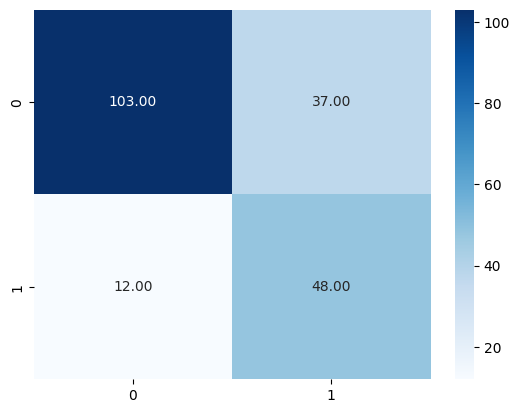

In [28]:
sns.heatmap(cm, annot = True, fmt=".2f", cmap='Blues')

In [29]:
data['Credit_risk'].value_counts()

Credit_risk
1    700
2    300
Name: count, dtype: int64

<pre>

>> Class imbalance is obvious here, we somehow overlooked it, 

- Let's deal with that and will do the modelling again.



In [30]:
y_probs = model_1.predict_proba(X_test)[:, 1]

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label=2)
auc_score = roc_auc_score(y_test, y_probs)

print(auc_score)

0.8078571428571428


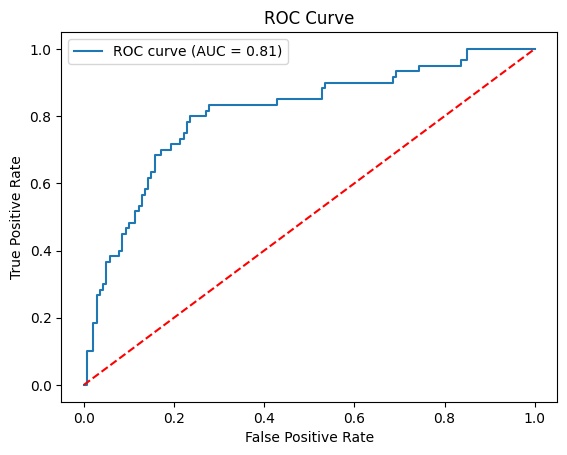

In [32]:
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


<pre>
- From the graph, Threshold value I will take as 0.80, 

- Now, we will try to predict it with this custom threshold!!



In [33]:
y_probs = model_1.predict_proba(X_test)[:, 1]


In [34]:
test_pred_cstm = np.where(y_probs>=0.80, 2, 1)

In [35]:
test_pred_cstm.shape

(200,)

In [36]:
accuracy_score(y_test, test_pred_cstm)

0.775

In [37]:
print(classification_report(y_test, test_pred_cstm))

              precision    recall  f1-score   support

           1       0.78      0.95      0.86       140
           2       0.76      0.37      0.49        60

    accuracy                           0.78       200
   macro avg       0.77      0.66      0.67       200
weighted avg       0.77      0.78      0.75       200



<pre>

- So, by increasing the threshold, it only means, 
  for a positive effect or to classify someone as bad, your probability have to be somewhat higher tham 80%, 

>> So, in this case, your false positive will be less, but chance of really missing some bad clients wil increase, 

- So, we will choos eanother threshold, probably lesser than 0.5, so that, when your data probability for Bad clients 
  are even 40 or 45%, we will classifiy them as bad, which will really decrease the False Negative.

  

In [38]:
jscores = tpr - fpr
best_threshold = thresholds[np.argmax(jscores)]

print(best_threshold)

0.540154692837345


In [39]:
test_pred_cstm2 = np.where(y_probs>=0.54, 2, 1)


In [40]:
accuracy_score(y_test, test_pred_cstm2)

0.77

In [41]:
print(classification_report(y_test, test_pred_cstm2))

              precision    recall  f1-score   support

           1       0.90      0.76      0.82       140
           2       0.59      0.80      0.68        60

    accuracy                           0.77       200
   macro avg       0.74      0.78      0.75       200
weighted avg       0.80      0.77      0.78       200



In [42]:
cm_2 = confusion_matrix(y_test, test_pred_cstm2)
print(cm_2)

[[106  34]
 [ 12  48]]


<Axes: >

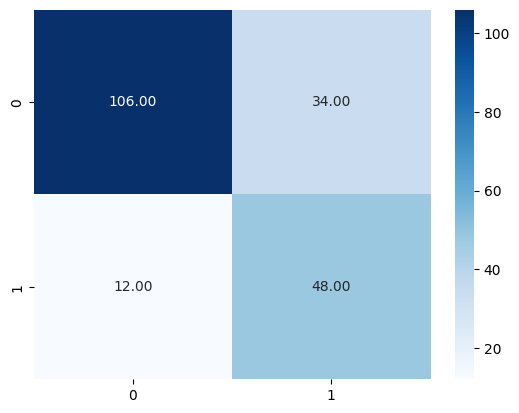

In [43]:
sns.heatmap(cm_2, annot=True, fmt = ".2f", cmap = 'Blues')

<pre>

This doesn't budge the model, 

>> So, things are now xrystal clear, we cannot proceed without treating the imabalanced data!!


<pre>

- Let's see our distribution of classes in the original dataset.



In [44]:
data.head()

,Account_status,Duration_months,Credit_history,loan_Purpose,Credit_amount,Savings/Bonds_AC,Present_Employment_since,loan_wage_ratio,Sex,Marital_status,co-debtors,Tenure,Assets/Physical_property,Age,Other_loans,Housing,Existing Credit,Job_status,Dependents,Telephone,Foreign_worker,Credit_risk
0,A11,6,A34,A43,1169,A65,A75,4,Male,single,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,Female,divorced/separated/married,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,Male,single,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,Male,single,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,Male,single,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [45]:
data['Credit_risk'].value_counts()

Credit_risk
1    700
2    300
Name: count, dtype: int64

In [46]:
data['Credit_risk'].value_counts(normalize=True)*100

Credit_risk
1    70.0
2    30.0
Name: proportion, dtype: float64

<Axes: xlabel='Credit_risk', ylabel='proportion'>

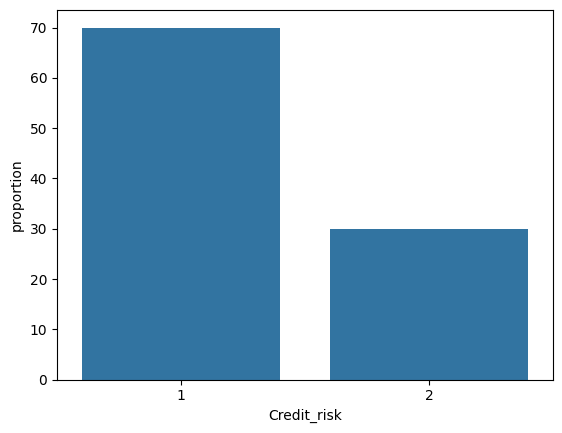

In [47]:
sns.barplot(data['Credit_risk'].value_counts(normalize=True)*100)

<pre>
- Class 2 (Bad Credit) is our minority class here, 

- Let's see what we can do about it:

>> We will try with SMOTE first



In [61]:
from imblearn.pipeline import Pipeline as imb_pipe
from imblearn.over_sampling import SMOTE


model_2 = imb_pipe([
    ("preprocessing_imb", ct), 
    ("smote", SMOTE(sampling_strategy=0.7, k_neighbors=3, random_state=42)), 
    ("model", LogisticRegression(class_weight="balanced"))
])

In [62]:
model_2.fit(X_train, y_train)

,steps,"[('preprocessing_imb', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('scale', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [63]:
test_imb_pred = model_2.predict(X_test)

In [64]:
print(accuracy_score(y_test, test_imb_pred))

0.775


In [65]:
print(classification_report(y_test, test_imb_pred))

              precision    recall  f1-score   support

           1       0.91      0.76      0.82       140
           2       0.59      0.82      0.69        60

    accuracy                           0.78       200
   macro avg       0.75      0.79      0.76       200
weighted avg       0.81      0.78      0.78       200



<pre>

>> So, with this Logistics Regression, even with SMOTE, all we are getting is a max of 0.82 recall.

>> Let's give some parameter grids and will try again.



In [68]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [80]:
param_grid = [
    {
        "smote__sampling_strategy": [0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 
    "smote__k_neighbors": [3, 5, 7, 9, 11], 
    "model": [LogisticRegression(class_weight="balanced")]
    }, 

    {
        "model": [RandomForestClassifier()], 
        "model__n_estimators": [100, 300], 
        "model__max_depth": [5, 10, None], 
        "smote__sampling_strategy": [0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 
        "smote__k_neighbors": [3, 5, 7, 9, 11]
    }

    # {
    #     "model": [XGBClassifier(eval_metric = "logloss")], 
    #     "model__learning_rate": [0.1, 0.01], 
    #     "model__max_depth": [3, 5], 
    #     "smote__sampling_strategy": [0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 
    #     "smote__k_neighbors": [3, 5, 7, 9, 11]
    # }
    
    
]
    

In [75]:
from sklearn.model_selection import GridSearchCV

In [81]:
grid_2 = GridSearchCV(estimator = model_2, 
                      param_grid=param_grid, 
                      scoring = "recall", 
                      cv = 5, 
                      n_jobs = -1, 
                      verbose = 2)

In [82]:
grid_2.fit(X_train, y_train)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


d:\Testing & Deployment\new env test\mock_drill\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
175 fits failed out of a total of 1050.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
175 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Testing & Deployment\new env test\mock_drill\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Testing & Deployment\new env test\mock_drill\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "d:\Testing & Deployment\new env test\m

,estimator,Pipeline(step...'balanced'))])
,param_grid,"[{'model': [LogisticRegre...ht='balanced')], 'smote__k_neighbors': [3, 5, ...], 'smote__sampling_strategy': [0.4, 0.5, ...]}, {'model': [RandomForestClassifier()], 'model__max_depth': [5, 10, ...], 'model__n_estimators': [100, 300], 'smote__k_neighbors': [3, 5, ...], ...}]"
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('cat', ...), ('scale', ...), ...]"


In [84]:
best_model = grid_2.best_estimator_

In [86]:
best_model

,steps,"[('preprocessing_imb', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('scale', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [89]:
grid_2.best_params_

{'model': RandomForestClassifier(),
 'model__max_depth': 5,
 'model__n_estimators': 300,
 'smote__k_neighbors': 5,
 'smote__sampling_strategy': 0.5}

In [91]:
grid_2.cv_results_

{'mean_fit_time': array([0.04854975, 0.3299808 , 0.32402678, 0.14870429, 0.08662   ,
        0.17444129, 0.03465877, 0.07335267, 0.08556037, 0.08936582,
        0.09136071, 0.07543774, 0.03542008, 0.08447552, 0.10793405,
        0.08974538, 0.07239099, 0.08683686, 0.03849401, 0.07601666,
        0.07764454, 0.07596664, 0.08493371, 0.08433428, 0.03154178,
        0.08527794, 0.06661959, 0.07566209, 0.08138928, 0.07104516,
        0.03872476, 0.39229789, 0.4117239 , 0.46126056, 0.43249335,
        0.42290468, 0.03697791, 0.38587546, 0.4096417 , 0.4233254 ,
        0.44472799, 0.42474284, 0.03912482, 0.38412094, 0.40616369,
        0.4549119 , 0.44458508, 0.37657986, 0.03370185, 0.35400438,
        0.40254908, 0.4643681 , 0.40666413, 0.47048359, 0.02798619,
        0.35164866, 0.37633452, 0.36633825, 0.42576504, 0.41439395,
        0.03508439, 1.06890888, 1.04587903, 0.99546671, 1.16971755,
        1.17564411, 0.0312768 , 0.93300052, 1.09386425, 1.10295963,
        1.13528042, 1.12232246,

In [92]:
y_test_pred = best_model.predict(X_test)

In [93]:
accuracy_score(y_test, y_test_pred)

0.755

In [94]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.77      0.93      0.84       140
           2       0.68      0.35      0.46        60

    accuracy                           0.76       200
   macro avg       0.72      0.64      0.65       200
weighted avg       0.74      0.76      0.73       200



<pre>

So, even after hyperparamter tuning we got the best model as RandoForestClassifier, 

- But its recall was so backward, that we cannot accept that at any cost, 

>> Let's try for another model using XGBoost, but it need the classes to be in a binary form as 0 and 1.

>> Let's do that!!



<pre>


>> We will create a new note with our preprocessed data and then will continue.